## 327 - Complicated Layouts with GridSpec

[Youtube](https://www.youtube.com/watch?v=fzEJvnaXYJw)

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from metpy.plots import SkewT
from metpy.calc import parcel_profile, lcl, cape_cin, get_layer
from metpy.units import units, pandas_dataframe_to_unit_arrays
import pandas as pd
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [2]:
station = 'OUN'
date = datetime(2013, 5, 20, 12)

data = WyomingUpperAir.request_data(date, station)
data = pandas_dataframe_to_unit_arrays(data)

In [3]:
parcel_prof = parcel_profile(data['pressure'], data['temperature'][0], data['dewpoint'][0].to('degC'))
cape, _ = cape_cin(data['pressure'], data['temperature'], data['dewpoint'], parcel_prof)

/tmp/ipykernel_421046/1207244715.py:1: UserWarning: Duplicate pressure(s) [55.3] hPa provided. Output profile includes duplicate temperatures as a result.
  parcel_prof = parcel_profile(data['pressure'], data['temperature'][0], data['dewpoint'][0].to('degC'))


(0.0, 3000.0)

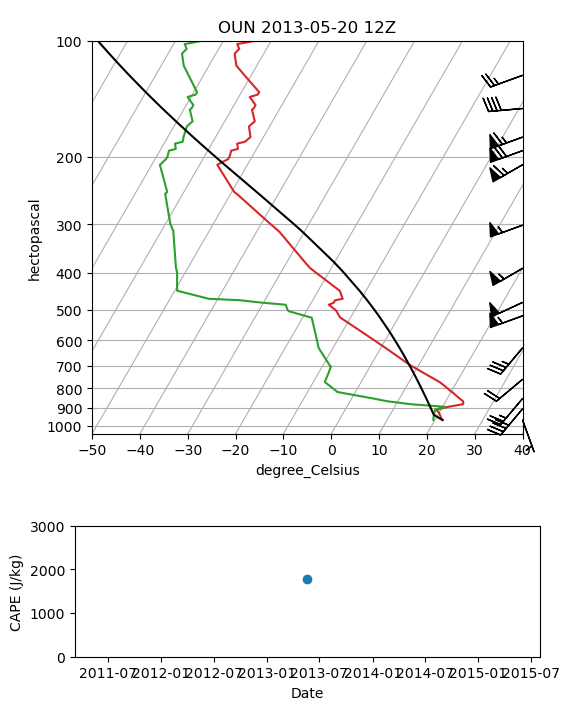

In [4]:
fig = plt.figure(figsize=(6, 8))
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.35)

skew = SkewT(fig, subplot=gs[0])
skew.plot(data['pressure'], data['temperature'], 'tab:red')
skew.plot(data['pressure'], data['dewpoint'], 'tab:green')
skew.plot(data['pressure'], parcel_prof, 'k')

wind_layer = get_layer(data['pressure'], data['u_wind'], data['v_wind'], depth=850 * units.hPa)
skew.plot_barbs(wind_layer[0][::5], wind_layer[1][::5], wind_layer[2][::5])

skew.ax.set_ylim(1050, 100)
skew.ax.set_xlim(-50, 40)
skew.ax.set_title(f'{station} {date:%Y-%m-%d %HZ}')

ax2 = fig.add_subplot(gs[1])
ax2.plot([date], [cape.m], 'o-')
ax2.set_ylabel('CAPE (J/kg)')
ax2.set_xlabel('Date')
ax2.set_ylim(0, 3000)